In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import ast

import warnings
warnings.filterwarnings('ignore')

# ORGANIZE SPEED DATA

In [24]:
def process_files(file_list, output_directory="1 updated"):
    # Ensure the output directory exists
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for file_name in file_list:
        try:
            print(f"Processing file: {file_name}")

            # Read the CSV file
            df = pd.read_csv(file_name)

            # Drop the 'Unnamed: 0' column if it exists
            if 'Unnamed: 0' in df.columns:
                df = df.drop(columns=['Unnamed: 0'])

            # Drop the 'timestamp' column if it exists
            if 'timestamp' in df.columns:
                df = df.drop(columns=['timestamp'])
                print("'timestamp' column dropped.")
            else:
                print("'timestamp' column does not exist.")

            # Set the first row as the header (columns)
            df.columns = df.iloc[0]

            # Rename the 14th column (index 13) to 'login_id'
            if len(df.columns) > 13:
                df.columns.values[13] = 'login_id'

            # Drop rows where the first column ('Date/Time') has the value 'Date/Time'
            df = df[df['Date/Time'] != 'Date/Time']

            # Drop rows where 'Date/Time' contains "No record found!"
            df = df[df['Date/Time'] != "No record found!"]

            # Rename all the parameters
            df.rename(columns={
                "Date/Time": "datetime",
                "IP Address": "ip_address",
                "OS": "os",
                "Browser": "browser",
                "Latency (ms)": "latency_ms",
                "Jitter (ms)": "jitter_ms",
                "Packet Loss (%)": "packet_loss_pct",
                "QoS": "qos",
                "Download (Kbps)": "download_kbps",
                "Download (%)": "download_pct",
                "Upload (kbps)": "upload_kbps",
                "Upload (%)": "upload_pct",
                "login_id": "login_id",
                "timestamp": "timestamp"
            }, inplace=True)

            # Save the processed DataFrame to a new CSV file
            output_file = os.path.join(output_directory, f"updated_{os.path.basename(file_name)}")
            df.to_csv(output_file, index=False)
            print(f"File saved: {output_file}\n")

        except Exception as e:
            print(f"Error processing file {file_name}: {e}\n")

# List of files to process
file_list = [
    "speed_all_nctt_15102024.csv",
    "speed_all_wctt_04112024.csv",
    "speed_all_wctt_06112024.csv",
    "speed_all_wctt_17102024.csv",
    "speed_all1_wctt_21102024.csv",
    "speed_fh_wctt_07102024.csv",
    "speed_fh_wctt_14102024.csv",
    "speed_hw_wctt_07102024.csv",
    "speed_hw_wctt_14102024.csv",
    "speed_nokia_nctt_16102024.csv",
    "speed_nokia_wctt_07112024.csv",
    "speed_nokia_wctt_10102024.csv",
    "speed_nokia_wctt_15102024.csv",
    "speed_nokia_wctt_22102024.csv",
    "speed_nokia_wctt_29102024.csv",
    "speed_zte_wctt_07102024.csv",
    "speed_zte_wctt_14102024.csv"
]

# Call the function to process the files
process_files(file_list)

Processing file: speed_all_nctt_15102024.csv
'timestamp' column does not exist.
File saved: 1 updated\updated_speed_all_nctt_15102024.csv

Processing file: speed_all_wctt_04112024.csv
'timestamp' column dropped.
File saved: 1 updated\updated_speed_all_wctt_04112024.csv

Processing file: speed_all_wctt_06112024.csv
'timestamp' column dropped.
File saved: 1 updated\updated_speed_all_wctt_06112024.csv

Processing file: speed_all_wctt_17102024.csv
'timestamp' column does not exist.
File saved: 1 updated\updated_speed_all_wctt_17102024.csv

Processing file: speed_all1_wctt_21102024.csv
'timestamp' column does not exist.
File saved: 1 updated\updated_speed_all1_wctt_21102024.csv

Processing file: speed_fh_wctt_07102024.csv
'timestamp' column does not exist.
File saved: 1 updated\updated_speed_fh_wctt_07102024.csv

Processing file: speed_fh_wctt_14102024.csv
'timestamp' column does not exist.
File saved: 1 updated\updated_speed_fh_wctt_14102024.csv

Processing file: speed_hw_wctt_07102024.csv

# MERGING SPEED DATA

In [25]:
import pandas as pd
import os



def merge_processed_files(file_paths, output_file="3 merged/summary_speed_data.csv"):
    # Initialize an empty list to hold dataframes
    dfs = []

    # Loop over the file paths, read the data, and append to the list
    for file in file_paths:
        df = pd.read_csv(file)
        dfs.append(df)

    # Concatenate all the dataframes into one
    merged_df = pd.concat(dfs, ignore_index=True)

    # Select the specific columns
    selected_columns = [
        "datetime", "ip_address", "os", "browser", "latency_ms", "jitter_ms", "packet_loss_pct", "qos",
        "download_kbps", "download_pct", "upload_kbps", "upload_pct", "Live", "login_id"
    ]

    merged_df = merged_df[selected_columns]

    # Save the merged data to a new CSV file
    os.makedirs(os.path.dirname(output_file), exist_ok=True)
    merged_df.to_csv(output_file, index=False)

    print(f"Data successfully merged and saved to '{output_file}'")


# List of file paths with just the filenames in the updated folder
file_paths = [
    "1 updated/updated_speed_all_nctt_15102024.csv",
    "1 updated/updated_speed_all_wctt_04112024.csv",
    "1 updated/updated_speed_all_wctt_06112024.csv",
    "1 updated/updated_speed_all_wctt_17102024.csv",
    "1 updated/updated_speed_all1_wctt_21102024.csv",
    "1 updated/updated_speed_fh_wctt_07102024.csv",
    "1 updated/updated_speed_fh_wctt_14102024.csv",
    "1 updated/updated_speed_hw_wctt_07102024.csv",
    "1 updated/updated_speed_hw_wctt_14102024.csv",
    "1 updated/updated_speed_nokia_nctt_16102024.csv",
    "1 updated/updated_speed_nokia_wctt_07112024.csv",
    "1 updated/updated_speed_nokia_wctt_10102024.csv",
    "1 updated/updated_speed_nokia_wctt_15102024.csv",
    "1 updated/updated_speed_nokia_wctt_22102024.csv",
    "1 updated/updated_speed_nokia_wctt_29102024.csv",
    "1 updated/updated_speed_zte_wctt_07102024.csv",
    "1 updated/updated_speed_zte_wctt_14102024.csv"
]

# Merge processed files
merge_processed_files(file_paths)


Data successfully merged and saved to '3 merged/summary_speed_data.csv'


# MAPPING CTT

In [27]:
import pandas as pd
import os

def process_ctt_files(file_list, output_dir):
    """
    Processes a list of CTT files: removes rows with missing login_id, 
    counts occurrences of login_id, and saves updated files.

    Parameters:
    - file_list (list): List of file paths to be processed.
    - output_dir (str): Directory to save the updated files.

    Returns:
    - None
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for file_name in file_list:
        try:
            # Load the dataset
            df = pd.read_csv(file_name)

            # Drop rows where login_id is NaN or missing
            df = df[df['login_id'].notna()]

            # Group by login_id and count occurrences
            login_counts = df['login_id'].value_counts().reset_index()
            login_counts.columns = ['login_id', 'ctt_exist']

            # Generate output file path
            base_name = os.path.basename(file_name)
            output_file = os.path.join(output_dir, f'updated_{base_name}')

            # Save the result to a new CSV file
            login_counts.to_csv(output_file, index=False)
            print(f"Processed and saved: {output_file}")

        except Exception as e:
            print(f"Failed to process {file_name}: {e}")

# File list
file_list = [
    'ctt_zte_wctt_07102024.csv',
    'ctt_zte_wctt_14102024.csv',
    'ctt_all_nctt_15102024.csv',
    'ctt_all_wctt_04112024.csv',
    'ctt_all_wctt_06112024.csv',
    'ctt_all_wctt_17102024.csv',
    'ctt_all1_wctt_21102024.csv',
    'ctt_fh_wctt_07102024.csv',
    'ctt_fh_wctt_14102024.csv',
    'ctt_hw_wctt_07102024.csv',
    'ctt_hw_wctt_14102024.csv',
    'ctt_nokia_nctt_16102024.csv',
    'ctt_nokia_wctt_07112024.csv',
    'ctt_nokia_wctt_10102024.csv',
    'ctt_nokia_wctt_15102024.csv',
    'ctt_nokia_wctt_22102024.csv',
    'ctt_nokia_wctt_29102024.csv',
]

# Output directory
output_dir = '1 updated'

# Process files
process_ctt_files(file_list, output_dir)


Processed and saved: 1 updated\updated_ctt_zte_wctt_07102024.csv
Processed and saved: 1 updated\updated_ctt_zte_wctt_14102024.csv
Processed and saved: 1 updated\updated_ctt_all_nctt_15102024.csv
Processed and saved: 1 updated\updated_ctt_all_wctt_04112024.csv
Processed and saved: 1 updated\updated_ctt_all_wctt_06112024.csv
Processed and saved: 1 updated\updated_ctt_all_wctt_17102024.csv
Processed and saved: 1 updated\updated_ctt_all1_wctt_21102024.csv
Processed and saved: 1 updated\updated_ctt_fh_wctt_07102024.csv
Processed and saved: 1 updated\updated_ctt_fh_wctt_14102024.csv
Processed and saved: 1 updated\updated_ctt_hw_wctt_07102024.csv
Processed and saved: 1 updated\updated_ctt_hw_wctt_14102024.csv
Processed and saved: 1 updated\updated_ctt_nokia_nctt_16102024.csv
Processed and saved: 1 updated\updated_ctt_nokia_wctt_07112024.csv
Processed and saved: 1 updated\updated_ctt_nokia_wctt_10102024.csv
Processed and saved: 1 updated\updated_ctt_nokia_wctt_15102024.csv
Processed and saved:

# MERGE CTT

In [28]:
import pandas as pd
import os

def merge_csv_files(file_paths, output_file):
    """
    Merge multiple CSV files into one and save the result to a new CSV file.

    Parameters:
    - file_paths (list): List of file paths to be merged.
    - output_file (str): Path to save the merged CSV file.

    Returns:
    - dict: Summary of the merge process including total rows and missing files.
    """
    # Initialize an empty DataFrame
    merged_df = pd.DataFrame()

    # Track missing files
    missing_files = []

    # Loop through file paths and read & concatenate
    for file in file_paths:
        if os.path.exists(file):  # Check if file exists
            df = pd.read_csv(file)
            merged_df = pd.concat([merged_df, df], ignore_index=True)
        else:
            missing_files.append(file)

    # Save the merged DataFrame to a new CSV file
    merged_df.to_csv(output_file, index=False)
    print(f"Merged file saved to {output_file}")

    # Return a summary of the merge process
    return {
        "total_rows": len(merged_df),
        "total_files_processed": len(file_paths),
        "missing_files": missing_files,
        "output_file": output_file
    }


# Example usage
file_paths = [
    "1 updated/updated_ctt_nokia_nctt_16102024.csv",
    "1 updated/updated_ctt_nokia_wctt_07112024.csv",
    "1 updated/updated_ctt_nokia_wctt_10102024.csv",
    "1 updated/updated_ctt_nokia_wctt_15102024.csv",
    "1 updated/updated_ctt_nokia_wctt_22102024.csv",
    "1 updated/updated_ctt_nokia_wctt_29102024.csv",
    "1 updated/updated_ctt_zte_wctt_07102024.csv",
    "1 updated/updated_ctt_zte_wctt_14102024.csv",
    "1 updated/updated_ctt_all_nctt_15102024.csv",
    "1 updated/updated_ctt_all_wctt_04112024.csv",
    "1 updated/updated_ctt_all_wctt_06112024.csv",
    "1 updated/updated_ctt_all_wctt_17102024.csv",
    "1 updated/updated_ctt_all1_wctt_21102024.csv",
    "1 updated/updated_ctt_fh_wctt_07102024.csv",
    "1 updated/updated_ctt_fh_wctt_14102024.csv",
    "1 updated/updated_ctt_hw_wctt_07102024.csv",
    "1 updated/updated_ctt_hw_wctt_14102024.csv"
]

output_file = "3 merged/ctt_summary.csv"

# Call the function and print the summary
summary = merge_csv_files(file_paths, output_file)
print("\nSummary of CSV Merge:")
for key, value in summary.items():
    print(f"{key.replace('_', ' ').capitalize()}: {value}")


Merged file saved to 3 merged/ctt_summary.csv

Summary of CSV Merge:
Total rows: 1108
Total files processed: 17
Missing files: []
Output file: 3 merged/ctt_summary.csv


# ORGANIZE TERMINATION DATA (DISCONNECTION)

In [26]:
import pandas as pd
import ast
import os

def process_termination_files(file_list, output_directory="1 updated"):
    # Ensure the output directory exists
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    relevant_types = ['PPPoE Session', 'User Request']

    for file_name in file_list:
        try:
            print(f"Processing file: {file_name}")

            # Read the CSV file
            df = pd.read_csv(file_name)

            # Create a new DataFrame for the transformed data
            result = []

            # Group by 'login_id' and 'timestamp' and aggregate relevant session counts
            for (login_id, timestamp), group in df.groupby(['login_id', 'timestamp']):
                row = {'login_id': login_id, 'timestamp': timestamp}

                for session_type in relevant_types:
                    # Get the counts for the current session type
                    counts = group.loc[group['Days'] == session_type].iloc[:, 1:16].values.flatten().tolist()
                    row[session_type] = counts

                result.append(row)

            # Convert the result to a DataFrame
            transformed_df = pd.DataFrame(result)

            # Convert string representations of lists into actual lists for all relevant types
            for session_type in relevant_types:
                transformed_df[session_type] = transformed_df[session_type].apply(
                    lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

            # Remove the first element from each list for all relevant types
            for session_type in relevant_types:
                transformed_df[session_type] = transformed_df[session_type].apply(
                    lambda x: x[1:16] if isinstance(x, list) else x)

            # Reset the index
            transformed_df.reset_index(drop=True, inplace=True)

            # Save the transformed DataFrame to a new CSV file
            output_file = os.path.join(output_directory, f"updated_{os.path.basename(file_name)}")
            transformed_df.to_csv(output_file, index=False)
            print(f"File transformed and saved: {output_file}")

        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

# List of termination-related files
file_list = [
    "termination_zte_wctt_14102024.csv",
    "termination_all_nctt_15102024.csv",
    "termination_all_wctt_04112024.csv",
    "termination_all_wctt_06112024.csv",
    "termination_all_wctt_17102024.csv",
    "termination_all1_wctt_21102024.csv",
    "termination_fh_wctt_07102024.csv",
    "termination_fh_wctt_14102024.csv",
    "termination_hw_wctt_07102024.csv",
    "termination_hw_wctt_14102024.csv",
    "termination_nokia_nctt_16102024.csv",
    "termination_nokia_wctt_07112024.csv",
    "termination_nokia_wctt_10102024.csv",
    "termination_nokia_wctt_15102024.csv",
    "termination_nokia_wctt_22102024.csv",
    "termination_nokia_wctt_29102024.csv",
    "termination_zte_wctt_07102024.csv",
]

# Process files
process_termination_files(file_list)


Processing file: termination_zte_wctt_14102024.csv
File transformed and saved: 1 updated\updated_termination_zte_wctt_14102024.csv
Processing file: termination_all_nctt_15102024.csv
File transformed and saved: 1 updated\updated_termination_all_nctt_15102024.csv
Processing file: termination_all_wctt_04112024.csv
File transformed and saved: 1 updated\updated_termination_all_wctt_04112024.csv
Processing file: termination_all_wctt_06112024.csv
File transformed and saved: 1 updated\updated_termination_all_wctt_06112024.csv
Processing file: termination_all_wctt_17102024.csv
File transformed and saved: 1 updated\updated_termination_all_wctt_17102024.csv
Processing file: termination_all1_wctt_21102024.csv
File transformed and saved: 1 updated\updated_termination_all1_wctt_21102024.csv
Processing file: termination_fh_wctt_07102024.csv
File transformed and saved: 1 updated\updated_termination_fh_wctt_07102024.csv
Processing file: termination_fh_wctt_14102024.csv
File transformed and saved: 1 upd

# MAPPING TERMINATION 

In [29]:
import pandas as pd
import ast
import os

def classify_daily_disconnections(pppoe_session):
    """Classify daily disconnection quality based on PPPoE session disconnections."""
    quality_per_day = []
    for daily_disconnections in pppoe_session:
        if daily_disconnections <= 1:
            quality_per_day.append('Excellent')
        elif 2 <= daily_disconnections <= 3:
            quality_per_day.append('Good')
        elif 4 <= daily_disconnections <= 5:
            quality_per_day.append('Poor')
        elif daily_disconnections > 5:
            quality_per_day.append('Critical')
    return quality_per_day

def process_termination_quality(file_list, output_directory="2 mapped"):
    # Ensure the output directory exists
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for file_name in file_list:
        try:
            print(f"Processing file: {file_name}")
            # Read the updated file
            input_file = f"1 updated/updated_{os.path.basename(file_name)}"
            df = pd.read_csv(input_file)

            # Convert string representations of lists into actual lists
            for session_type in ['PPPoE Session', 'User Request']:
                if session_type in df.columns:
                    df[session_type] = df[session_type].apply(
                        lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

            # Ensure the entries are lists of integers for PPPoE Session
            if 'PPPoE Session' in df.columns:
                df['PPPoE Session'] = df['PPPoE Session'].apply(
                    lambda x: [int(i) for i in x] if isinstance(x, list) else [])

            # Drop the 'User Request' column
            if 'User Request' in df.columns:
                df = df.drop(['User Request'], axis=1)

            # Add a column for daily disconnection quality
            if 'PPPoE Session' in df.columns:
                df['disconnection_quality_per_day'] = df['PPPoE Session'].apply(
                    classify_daily_disconnections)

            # Save the updated DataFrame to a new file
            output_file = os.path.join(output_directory, f"mapped_{os.path.basename(file_name)}")
            df.to_csv(output_file, index=False)
            print(f"File processed and saved: {output_file}")

        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

# List of termination-related files
file_list = [
    "termination_zte_wctt_14102024.csv",
    "termination_all_nctt_15102024.csv",
    "termination_all_wctt_04112024.csv",
    "termination_all_wctt_06112024.csv",
    "termination_all_wctt_17102024.csv",
    "termination_all1_wctt_21102024.csv",
    "termination_fh_wctt_07102024.csv",
    "termination_fh_wctt_14102024.csv",
    "termination_hw_wctt_07102024.csv",
    "termination_hw_wctt_14102024.csv",
    "termination_nokia_nctt_16102024.csv",
    "termination_nokia_wctt_07112024.csv",
    "termination_nokia_wctt_10102024.csv",
    "termination_nokia_wctt_15102024.csv",
    "termination_nokia_wctt_22102024.csv",
    "termination_nokia_wctt_29102024.csv",
    "termination_zte_wctt_07102024.csv",
]

# Process files
process_termination_quality(file_list)


Processing file: termination_zte_wctt_14102024.csv
File processed and saved: 2 mapped\mapped_termination_zte_wctt_14102024.csv
Processing file: termination_all_nctt_15102024.csv
File processed and saved: 2 mapped\mapped_termination_all_nctt_15102024.csv
Processing file: termination_all_wctt_04112024.csv
File processed and saved: 2 mapped\mapped_termination_all_wctt_04112024.csv
Processing file: termination_all_wctt_06112024.csv
File processed and saved: 2 mapped\mapped_termination_all_wctt_06112024.csv
Processing file: termination_all_wctt_17102024.csv
File processed and saved: 2 mapped\mapped_termination_all_wctt_17102024.csv
Processing file: termination_all1_wctt_21102024.csv
File processed and saved: 2 mapped\mapped_termination_all1_wctt_21102024.csv
Processing file: termination_fh_wctt_07102024.csv
File processed and saved: 2 mapped\mapped_termination_fh_wctt_07102024.csv
Processing file: termination_fh_wctt_14102024.csv
File processed and saved: 2 mapped\mapped_termination_fh_wctt

# MERGE TERMINATION DATA

In [30]:
import pandas as pd

def merge_termination_data(file_paths, output_file, selected_columns):
    """
    Merge multiple termination data CSV files into one and save the result.

    Parameters:
    - file_paths (list): List of file paths to be merged.
    - output_file (str): Path for the output CSV file.
    - selected_columns (list): List of columns to include in the merged file.

    Returns:
    - None
    """
    # Initialize an empty list to hold dataframes
    dfs = []
    
    # Read and append each file to the list of DataFrames
    for file in file_paths:
        try:
            print(f"Reading file: {file}")
            df = pd.read_csv(file)
            dfs.append(df)
        except Exception as e:
            print(f"Error reading file {file}: {e}")
            continue
    
    # Concatenate all dataframes
    if dfs:
        merged_df = pd.concat(dfs, ignore_index=True)
        
        # Select specific columns
        merged_df = merged_df[selected_columns]
        
        # Save the merged DataFrame to a CSV file
        merged_df.to_csv(output_file, index=False)
        print(f"Data successfully merged and saved to '{output_file}'")
    else:
        print("No valid dataframes to merge.")

# Example usage
file_paths = [
    "2 mapped/mapped_termination_zte_wctt_14102024.csv",
    "2 mapped/mapped_termination_all_nctt_15102024.csv",
    "2 mapped/mapped_termination_all_wctt_04112024.csv",
    "2 mapped/mapped_termination_all_wctt_06112024.csv",
    "2 mapped/mapped_termination_all_wctt_17102024.csv",
    "2 mapped/mapped_termination_all1_wctt_21102024.csv",
    "2 mapped/mapped_termination_fh_wctt_07102024.csv",
    "2 mapped/mapped_termination_fh_wctt_14102024.csv",
    "2 mapped/mapped_termination_hw_wctt_07102024.csv",
    "2 mapped/mapped_termination_hw_wctt_14102024.csv",
    "2 mapped/mapped_termination_nokia_nctt_16102024.csv",
    "2 mapped/mapped_termination_nokia_wctt_07112024.csv",
    "2 mapped/mapped_termination_nokia_wctt_10102024.csv",
    "2 mapped/mapped_termination_nokia_wctt_15102024.csv",
    "2 mapped/mapped_termination_nokia_wctt_22102024.csv",
    "2 mapped/mapped_termination_nokia_wctt_29102024.csv",
    "2 mapped/mapped_termination_zte_wctt_07102024.csv"
]

output_file = "3 merged/summary_termination_data.csv"

selected_columns = ["login_id", "timestamp", "PPPoE Session", "disconnection_quality_per_day"]

merge_termination_data(file_paths, output_file, selected_columns)


Reading file: 2 mapped/mapped_termination_zte_wctt_14102024.csv
Reading file: 2 mapped/mapped_termination_all_nctt_15102024.csv
Reading file: 2 mapped/mapped_termination_all_wctt_04112024.csv
Reading file: 2 mapped/mapped_termination_all_wctt_06112024.csv
Reading file: 2 mapped/mapped_termination_all_wctt_17102024.csv
Reading file: 2 mapped/mapped_termination_all1_wctt_21102024.csv
Reading file: 2 mapped/mapped_termination_fh_wctt_07102024.csv
Reading file: 2 mapped/mapped_termination_fh_wctt_14102024.csv
Reading file: 2 mapped/mapped_termination_hw_wctt_07102024.csv
Reading file: 2 mapped/mapped_termination_hw_wctt_14102024.csv
Reading file: 2 mapped/mapped_termination_nokia_nctt_16102024.csv
Reading file: 2 mapped/mapped_termination_nokia_wctt_07112024.csv
Reading file: 2 mapped/mapped_termination_nokia_wctt_10102024.csv
Reading file: 2 mapped/mapped_termination_nokia_wctt_15102024.csv
Reading file: 2 mapped/mapped_termination_nokia_wctt_22102024.csv
Reading file: 2 mapped/mapped_ter

# MERGE SPEED, TERMINATION AND CTT DATA

In [31]:
import pandas as pd

def merge_datasets_with_analysis(termination_file, speed_file, ctt_file, output_file):
    """
    Merge termination, speed, and CTT datasets, analyze unique login IDs, and save the result.

    Parameters:
    - termination_file (str): Path to the termination data CSV file.
    - speed_file (str): Path to the speed data CSV file.
    - ctt_file (str): Path to the CTT summary data CSV file.
    - output_file (str): Path to save the merged data CSV file.

    Returns:
    - dict: Summary of merging process including unique counts and matching IDs.
    """
    # Load datasets
    df1 = pd.read_csv(termination_file)
    df2 = pd.read_csv(speed_file)
    df3 = pd.read_csv(ctt_file)

    # Remove duplicates in termination and CTT data based on login_id
    df1_unique = df1.drop_duplicates(subset='login_id')
    df3_unique = df3.drop_duplicates(subset='login_id')

    # Merge termination data with speed data
    merged_df1 = pd.merge(df2, df1_unique, on='login_id', how='left')

    # Merge the result with CTT summary data
    merged_df = pd.merge(merged_df1, df3_unique, on='login_id', how='left')

    # Calculate unique login_id counts for each dataset
    unique_login_id_df1 = df1['login_id'].nunique()
    unique_login_id_df2 = df2['login_id'].nunique()
    unique_login_id_df3 = df3['login_id'].nunique()

    # Find matching login_id values across datasets
    matching_ids_termination_speed = set(df1['login_id']).intersection(set(df2['login_id']))
    matching_ids_all = matching_ids_termination_speed.intersection(set(df3['login_id']))
    num_matching_ids_all = len(matching_ids_all)

    # Save the merged DataFrame
    merged_df.to_csv(output_file, index=False)

    # Return a summary dictionary
    return {
        "unique_login_id_termination_data": unique_login_id_df1,
        "unique_login_id_speed_data": unique_login_id_df2,
        "unique_login_id_ctt_data": unique_login_id_df3,
        "num_matching_login_ids_all": num_matching_ids_all,
        "termination_data_length": len(df1),
        "speed_data_length": len(df2),
        "ctt_data_length": len(df3),
        "merged_data_length": len(merged_df),
        "output_file": output_file
    }

# Example usage of the function
summary = merge_datasets_with_analysis(
    termination_file='3 merged/summary_termination_data.csv',
    speed_file='3 merged/summary_speed_data.csv',
    ctt_file='3 merged/ctt_summary.csv',
    output_file='3 merged/mapped_summary_data.csv'
)

# Print the summary results
print("Summary of Dataset Merge:")
for key, value in summary.items():
    print(f"{key.replace('_', ' ').capitalize()}: {value}")


Summary of Dataset Merge:
Unique login id termination data: 1108
Unique login id speed data: 443
Unique login id ctt data: 1108
Num matching login ids all: 443
Termination data length: 1224
Speed data length: 3723
Ctt data length: 1108
Merged data length: 3723
Output file: 3 merged/mapped_summary_data.csv


# PROCESS THE DATA

In [28]:
file_name = '3 merged/mapped_summary_data.csv'
df = pd.read_csv(file_name)

In [29]:
df.head()

,datetime,ip_address,os,browser,latency_ms,jitter_ms,packet_loss_pct,qos,download_kbps,download_pct,upload_kbps,upload_pct,Live,login_id,timestamp,PPPoE Session,disconnection_quality_per_day,ctt_exist
0,05-12-23 10:24,210.186.161.33,mac 10.15.7,safari 605.1.15,5,1,0,1BB300BIZ50,"315,360",100%,"53,741",100%,NaN,0194696504@unifibiz,15-10-24 14:55,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4
1,05-12-23 10:23,210.186.161.33,mac 10.15.7,safari 605.1.15,14,8,0,1BB300BIZ50,"136,614",45%,"18,979",37%,NaN,0194696504@unifibiz,15-10-24 14:55,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4
2,26-10-23 16:17,60.48.236.64,iphone 10,crios 118.0.5993.92,5,1,0,1BB300BIZ50,"317,729",100%,"52,243",100%,NaN,0194696504@unifibiz,15-10-24 14:55,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4
3,26-10-23 16:03,175.138.81.3,mac 10.15.7,chrome 117.0.0.0,3,1,0,1BB300BIZ50,"314,410",100%,"53,246",100%,NaN,0194696504@unifibiz,15-10-24 14:55,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4
4,26-10-23 16:02,175.138.81.3,mac 10.15.7,chrome 117.0.0.0,5,1,0,1BB300BIZ50,"132,408",44%,"55,345",100%,NaN,0194696504@unifibiz,15-10-24 14:55,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4


In [30]:
# Drop the 'Live' column from the dataset
df = df.drop(columns=['Live'])

In [31]:
df['datetime']

0       05-12-23 10:24
1       05-12-23 10:23
2       26-10-23 16:17
3       26-10-23 16:03
4       26-10-23 16:02
             ...      
3718    04-10-24 16:06
3719    12-05-24 16:07
3720    12-05-24 16:07
3721    27-02-24 16:10
3722    27-02-24 16:07
Name: datetime, Length: 3723, dtype: object

In [32]:
# Remove % symbols and commas.
# Ensure the columns data type in numerical.
df['download_kbps'] = df['download_kbps'].str.replace(',', '').astype(float)
df['upload_kbps'] = df['upload_kbps'].str.replace(',', '').astype(float)
df['download_pct'] = df['download_pct'].str.replace('%', '').astype(float)
df['upload_pct'] = df['upload_pct'].str.replace('%', '').astype(float)

In [33]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%y %H:%M', errors='coerce')
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%y %H:%M', errors='coerce')

In [34]:
print(df[df['datetime'].isna()])
print(df[df['timestamp'].isna()])


Empty DataFrame
Columns: [datetime, ip_address, os, browser, latency_ms, jitter_ms, packet_loss_pct, qos, download_kbps, download_pct, upload_kbps, upload_pct, login_id, timestamp, PPPoE Session, disconnection_quality_per_day, ctt_exist]
Index: []
Empty DataFrame
Columns: [datetime, ip_address, os, browser, latency_ms, jitter_ms, packet_loss_pct, qos, download_kbps, download_pct, upload_kbps, upload_pct, login_id, timestamp, PPPoE Session, disconnection_quality_per_day, ctt_exist]
Index: []


In [35]:
df.head()

,datetime,ip_address,os,browser,latency_ms,jitter_ms,packet_loss_pct,qos,download_kbps,download_pct,upload_kbps,upload_pct,login_id,timestamp,PPPoE Session,disconnection_quality_per_day,ctt_exist
0,2023-12-05 10:24:00,210.186.161.33,mac 10.15.7,safari 605.1.15,5,1,0,1BB300BIZ50,315360.0,100.0,53741.0,100.0,0194696504@unifibiz,2024-10-15 14:55:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4
1,2023-12-05 10:23:00,210.186.161.33,mac 10.15.7,safari 605.1.15,14,8,0,1BB300BIZ50,136614.0,45.0,18979.0,37.0,0194696504@unifibiz,2024-10-15 14:55:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4
2,2023-10-26 16:17:00,60.48.236.64,iphone 10,crios 118.0.5993.92,5,1,0,1BB300BIZ50,317729.0,100.0,52243.0,100.0,0194696504@unifibiz,2024-10-15 14:55:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4
3,2023-10-26 16:03:00,175.138.81.3,mac 10.15.7,chrome 117.0.0.0,3,1,0,1BB300BIZ50,314410.0,100.0,53246.0,100.0,0194696504@unifibiz,2024-10-15 14:55:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4
4,2023-10-26 16:02:00,175.138.81.3,mac 10.15.7,chrome 117.0.0.0,5,1,0,1BB300BIZ50,132408.0,44.0,55345.0,100.0,0194696504@unifibiz,2024-10-15 14:55:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   datetime                       3723 non-null   datetime64[ns]
 1   ip_address                     3723 non-null   object        
 2   os                             3723 non-null   object        
 3   browser                        3723 non-null   object        
 4   latency_ms                     3723 non-null   int64         
 5   jitter_ms                      3723 non-null   int64         
 6   packet_loss_pct                3723 non-null   int64         
 7   qos                            3723 non-null   object        
 8   download_kbps                  3723 non-null   float64       
 9   download_pct                   3723 non-null   float64       
 10  upload_kbps                    3723 non-null   float64       
 11  upload_pct       

In [38]:
len(df)

3723

In [39]:
df.isnull().sum()

datetime                         0
ip_address                       0
os                               0
browser                          0
latency_ms                       0
jitter_ms                        0
packet_loss_pct                  0
qos                              0
download_kbps                    0
download_pct                     0
upload_kbps                      0
upload_pct                       0
login_id                         0
timestamp                        0
PPPoE Session                    0
disconnection_quality_per_day    0
ctt_exist                        0
dtype: int64

In [40]:
# Assuming you have a DataFrame `df` with the columns
new_order = ['datetime', 'timestamp', 'ip_address', 'login_id', 'os', 'browser', 'qos', 
             'latency_ms', 'jitter_ms', 'packet_loss_pct', 'download_kbps', 'download_pct', 
             'upload_kbps', 'upload_pct', 'PPPoE Session', 'disconnection_quality_per_day', 
             'ctt_exist']

# Rearranging columns based on the new order
df = df[new_order]

In [41]:
# List of columns to drop
columns_to_drop = ['ip_address', 'os', 'browser', 'qos', 'download_kbps', 'upload_kbps']

# Drop the columns
df = df.drop(columns=columns_to_drop)

In [42]:
df.head()

,datetime,timestamp,login_id,latency_ms,jitter_ms,packet_loss_pct,download_pct,upload_pct,PPPoE Session,disconnection_quality_per_day,ctt_exist
0,2023-12-05 10:24:00,2024-10-15 14:55:00,0194696504@unifibiz,5,1,0,100.0,100.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4
1,2023-12-05 10:23:00,2024-10-15 14:55:00,0194696504@unifibiz,14,8,0,45.0,37.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4
2,2023-10-26 16:17:00,2024-10-15 14:55:00,0194696504@unifibiz,5,1,0,100.0,100.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4
3,2023-10-26 16:03:00,2024-10-15 14:55:00,0194696504@unifibiz,3,1,0,100.0,100.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4
4,2023-10-26 16:02:00,2024-10-15 14:55:00,0194696504@unifibiz,5,1,0,44.0,100.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4


In [43]:
# Function to get the most frequent value in a list
def get_most_frequent(value_list):
    # Count the occurrences of each value and return the most frequent one
    return pd.Series(value_list).mode()[0]  # mode()[0] gives the most frequent value

# Apply the function to compute the average disconnection quality (mode of the list)
df['average_disconnection_15days'] = df['disconnection_quality_per_day'].apply(lambda x: get_most_frequent(eval(x)))

# Displaying the required format
df[['datetime', 'disconnection_quality_per_day', 'average_disconnection_15days']]

,datetime,disconnection_quality_per_day,average_disconnection_15days
0,2023-12-05 10:24:00,"['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",Excellent
1,2023-12-05 10:23:00,"['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",Excellent
2,2023-10-26 16:17:00,"['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",Excellent
3,2023-10-26 16:03:00,"['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",Excellent
4,2023-10-26 16:02:00,"['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",Excellent
...,...,...,...
3718,2024-10-04 16:06:00,"['Excellent', 'Good', 'Poor', 'Poor', 'Excellent', 'Poor', 'Good', 'Poor', 'Good', 'Poor', 'Critical', 'Good', 'Critical', 'Good']",Good
3719,2024-05-12 16:07:00,"['Excellent', 'Good', 'Poor', 'Poor', 'Excellent', 'Poor', 'Good', 'Poor', 'Good', 'Poor', 'Critical', 'Good', 'Critical', 'Good']",Good
3720,2024-05-12 16:07:00,"['Excellent', 'Good', 'Poor', 'Poor', 'Excellent', 'Poor', 'Good', 'Poor', 'Good', 'Poor', 'Critical', 'Good', 'Critical', 'Good']",Good
3721,2024-02-27 16:10:00,"['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",Excellent


In [44]:
# Define the mapping dictionary
quality_map = {
    'Excellent': 1,
    'Good': 3,
    'Poor': 5,
    'Critical': 6
}

# Map the 'average_disconnection_7days' to numeric values
df['average_disconnection_15days'] = df['average_disconnection_15days'].map(quality_map)


In [45]:
# Display the DataFrame with all rows fully visible
pd.set_option('display.max_colwidth', None)  # Ensure full content of the lists is shown
# pd.set_option('display.max_rows', None)      # Display all rows (adjust if dataset is very large)

# pd.reset_option('display.max_colwidth')
# pd.reset_option('display.max_rows')

In [46]:
df.head(20)

,datetime,timestamp,login_id,latency_ms,jitter_ms,packet_loss_pct,download_pct,upload_pct,PPPoE Session,disconnection_quality_per_day,ctt_exist,average_disconnection_15days
0,2023-12-05 10:24:00,2024-10-15 14:55:00,0194696504@unifibiz,5,1,0,100.0,100.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4,1
1,2023-12-05 10:23:00,2024-10-15 14:55:00,0194696504@unifibiz,14,8,0,45.0,37.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4,1
2,2023-10-26 16:17:00,2024-10-15 14:55:00,0194696504@unifibiz,5,1,0,100.0,100.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4,1
3,2023-10-26 16:03:00,2024-10-15 14:55:00,0194696504@unifibiz,3,1,0,100.0,100.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4,1
4,2023-10-26 16:02:00,2024-10-15 14:55:00,0194696504@unifibiz,5,1,0,44.0,100.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4,1
5,2023-10-26 15:57:00,2024-10-15 14:55:00,0194696504@unifibiz,6,1,0,86.0,100.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",4,1
6,2024-09-07 19:48:00,2024-10-15 14:58:00,idrismohd49@unifi,10,1,0,14.0,100.0,"[0, 0, 0, 1, 2, 3, 2, 3, 2, 2, 2, 4, 3, 3]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Poor', 'Good', 'Good']",1,3
7,2024-04-15 11:05:00,2024-10-15 15:02:00,ang.kl@unifi,12,2,0,93.0,100.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",1,1
8,2023-11-14 13:40:00,2024-10-15 15:03:00,ayuniza88@unifi,8,1,0,100.0,100.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",1,1
9,2024-08-30 00:39:00,2024-10-15 15:05:00,dsdrmay2900@unifibiz,11,3,0,59.0,100.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",1,1


In [47]:
# Calculate the 15-day range
df['start_date'] = df['timestamp'] - pd.Timedelta(days=15)

# Filter rows where datetime is within the range
filtered_df = df[(df['datetime'] >= df['start_date']) & (df['datetime'] <= df['timestamp'])]

# Drop the auxiliary column start_date if needed
filtered_df = filtered_df.drop(columns=['start_date'])

In [48]:
df=filtered_df.reset_index(drop=True)

In [49]:
len(df)

343

In [50]:
df.head(100)

,datetime,timestamp,login_id,latency_ms,jitter_ms,packet_loss_pct,download_pct,upload_pct,PPPoE Session,disconnection_quality_per_day,ctt_exist,average_disconnection_15days
0,2024-10-05 10:59:00,2024-10-15 15:43:00,360trampoline@unifibiz,2,2,0,100.0,100.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",1,1
1,2024-10-10 08:34:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,26,5,0,7.0,69.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",1,1
2,2024-10-10 08:28:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,12,61,0,6.0,50.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",1,1
3,2024-10-10 08:25:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,48,134,0,17.0,95.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",1,1
4,2024-10-10 08:25:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,16,45,0,15.0,100.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-10-28 22:37:00,2024-11-06 09:37:00,gee62@unifi,6,1,0,100.0,100.0,"[1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Good', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",1,1
96,2024-11-01 12:40:00,2024-11-06 09:51:00,ambassador@unifibiz,6,2,0,100.0,100.0,"[1, 13, 5, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]","['Excellent', 'Critical', 'Poor', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Good', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",2,1
97,2024-11-01 13:01:00,2024-11-06 10:19:00,meeranabila@unifi,11,3,0,98.0,100.0,"[2, 4, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]","['Good', 'Poor', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",5,1
98,2024-11-06 10:06:00,2024-11-06 10:23:00,elfah13@unifi,10,2,0,100.0,100.0,"[0, 0, 0, 1, 0, 0, 12, 1, 0, 1, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Critical', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",3,1


In [56]:
df.to_csv('3 merged/filtered_data.csv', index=False)

print(f"Filtered data has been saved to {output_file}")

Filtered data has been saved to 4 merged/filtered_data.csv


# ANALYSIS

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df=pd.read_csv('3 merged/filtered_data.csv')
df.head()

,datetime,timestamp,login_id,latency_ms,jitter_ms,packet_loss_pct,download_pct,upload_pct,PPPoE Session,disconnection_quality_per_day,ctt_exist,average_disconnection_15days
0,2024-10-05 10:59:00,2024-10-15 15:43:00,360trampoline@unifibiz,2,2,0,100.0,100.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",1,1
1,2024-10-10 08:34:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,26,5,0,7.0,69.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",1,1
2,2024-10-10 08:28:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,12,61,0,6.0,50.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",1,1
3,2024-10-10 08:25:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,48,134,0,17.0,95.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",1,1
4,2024-10-10 08:25:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,16,45,0,15.0,100.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent']",1,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   datetime                       343 non-null    object 
 1   timestamp                      343 non-null    object 
 2   login_id                       343 non-null    object 
 3   latency_ms                     343 non-null    int64  
 4   jitter_ms                      343 non-null    int64  
 5   packet_loss_pct                343 non-null    int64  
 6   download_pct                   343 non-null    float64
 7   upload_pct                     343 non-null    float64
 8   PPPoE Session                  343 non-null    object 
 9   disconnection_quality_per_day  343 non-null    object 
 10  ctt_exist                      343 non-null    int64  
 11  average_disconnection_15days   343 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 3

In [59]:
df.describe()

,latency_ms,jitter_ms,packet_loss_pct,download_pct,upload_pct,ctt_exist,average_disconnection_15days
count,343.000000,343.000000,343.0,343.000000,343.000000,343.000000,343.000000
mean,16.688047,15.696793,0.0,42.134111,78.495627,2.615160,1.443149
std,56.688170,64.145177,0.0,36.651186,31.125653,1.946057,1.314162
min,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000
25%,6.000000,1.000000,0.0,12.500000,60.500000,1.000000,1.000000
50%,9.000000,2.000000,0.0,27.000000,100.000000,2.000000,1.000000
75%,12.000000,6.000000,0.0,84.500000,100.000000,4.000000,1.000000
max,674.000000,1012.000000,0.0,100.000000,100.000000,13.000000,6.000000


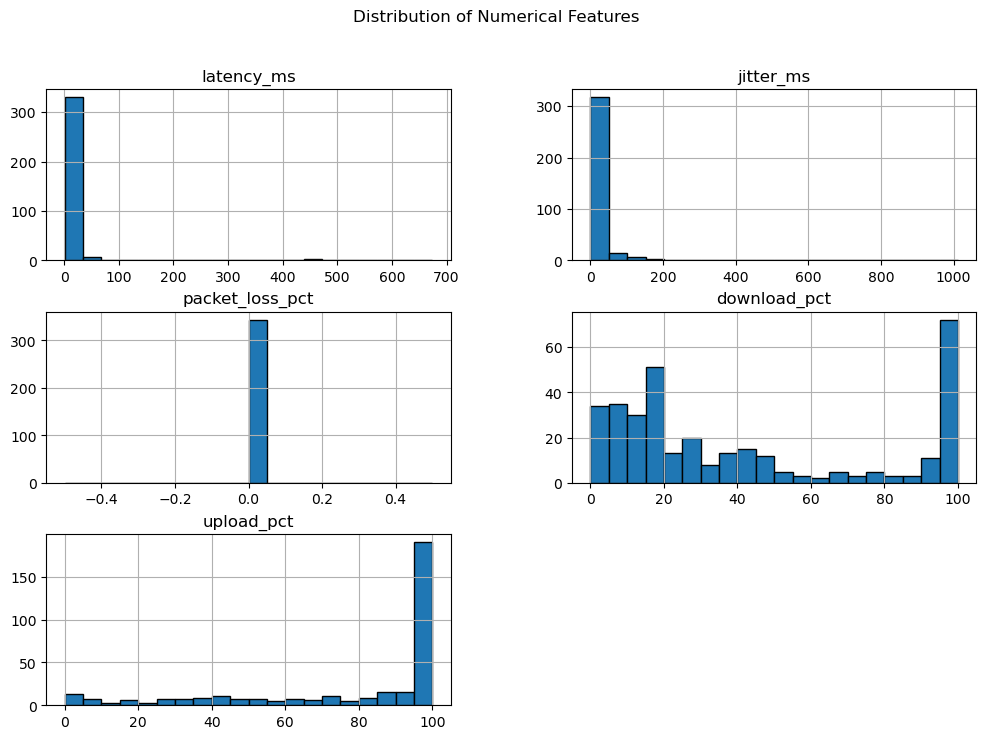

In [61]:
# Distribution of numerical columns
numerical_columns = ['latency_ms', 'jitter_ms', 'packet_loss_pct', 'download_pct', 'upload_pct']
df[numerical_columns].hist(figsize=(12, 8), bins=20, edgecolor='k')
plt.suptitle("Distribution of Numerical Features")
plt.show()

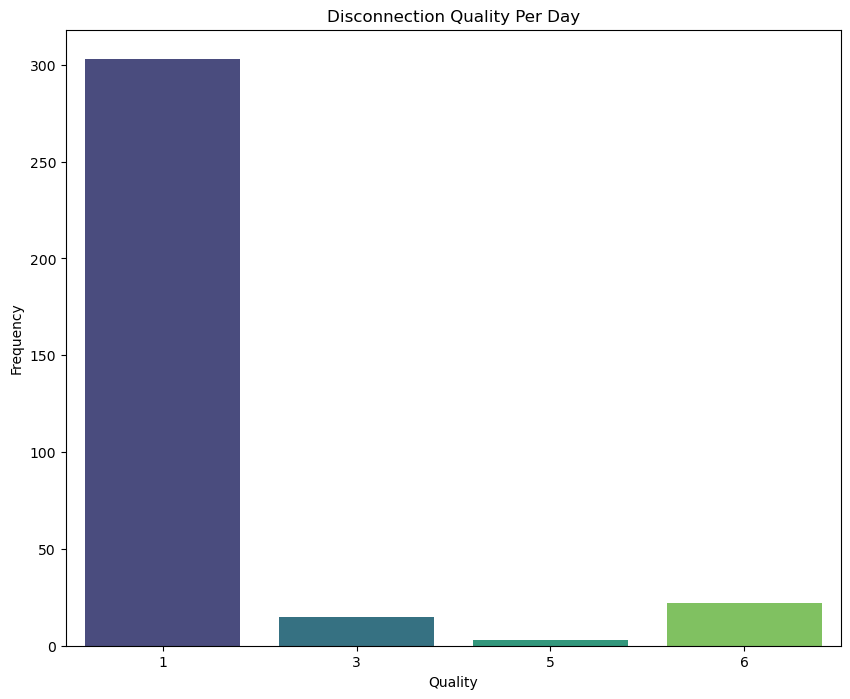

In [75]:
# Bar plot for disconnection quality per day
quality_counts = df['average_disconnection_15days'].value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(x=quality_counts.index, y=quality_counts.values, palette='viridis')
plt.title("Disconnection Quality Per Day")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()


ctt_exist Distribution:
ctt_exist
1     144
2      64
6      50
3      48
4      24
5       8
8       4
13      1
Name: count, dtype: int64


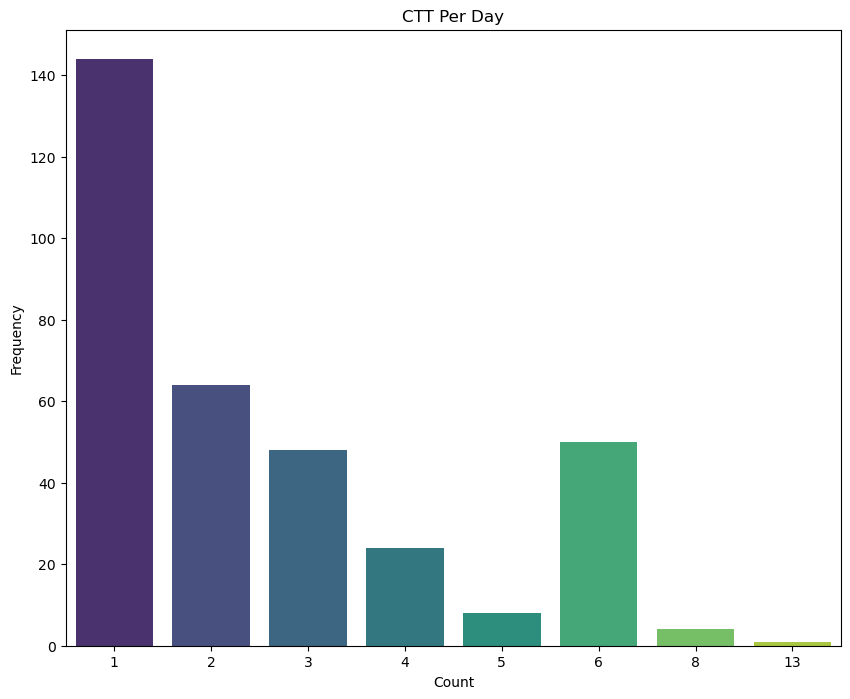

In [74]:
print("\nctt_exist Distribution:")
print(df['ctt_exist'].value_counts())

ctt_counts = df['ctt_exist'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=ctt_counts.index, y=ctt_counts.values, palette='viridis')
plt.title('CTT Per Day')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

In [72]:
len(df)

343

# RULE-BASED APPROACH

In [83]:
def classify_quality(row):
    # Extract relevant values from the row
    download_pct = row['download_pct']
    upload_pct = row['upload_pct']
    latency = row['latency_ms']
    jitter = row['jitter_ms']
    packet_loss = row['packet_loss_pct']
    disconnections = row['average_disconnection_15days'] 
    ctt_volume = row['ctt_exist'] 

    # Apply classification rules
    if (
        download_pct > 90 and upload_pct > 90 and
        latency < 20 and jitter < 5 and packet_loss < 1 and
        disconnections <= 1 and ctt_volume <= 1
    ):
        return "Excellent"
    elif (
        70 <= download_pct <= 90 and 70 <= upload_pct <= 90 and
        20 <= latency <= 50 and 5 <= jitter <= 10 and packet_loss < 2 and
        2 <= disconnections <= 3 and 1 <= ctt_volume <= 2
    ):
        return "Good"
    elif (
        download_pct < 70 or upload_pct < 70 or
        latency > 50 or jitter > 10 or packet_loss > 2 or
        disconnections > 3 or ctt_volume > 2
    ):
        if (
            download_pct < 50 or upload_pct < 50 or
            latency > 100 or jitter > 20 or packet_loss > 5 or
            disconnections > 5 or ctt_volume > 5
        ):
            return "Critical"
        return "Poor"
    return "Unknown"

In [84]:
def classify_remarks(row):
    # Extract relevant values from the row
    download_pct = row['download_pct']
    upload_pct = row['upload_pct']
    latency = row['latency_ms']
    jitter = row['jitter_ms']
    packet_loss = row['packet_loss_pct']
    disconnections = row['average_disconnection_15days']
    ctt_volume = row['ctt_exist']

    remarks = []

    # Apply classification rules
    if (
        download_pct > 90 and upload_pct > 90 and
        latency < 20 and jitter < 5 and packet_loss < 1 and
        disconnections <= 1 and ctt_volume <= 1
    ):
        return "Excellent", "All parameters are optimal (Download > 90%, Upload > 90%, Latency < 20ms, Jitter < 5ms, Packet Loss < 1%, Disconnections <= 1, CTT Volume <= 1)"
    
    elif (
        70 <= download_pct <= 90 and 70 <= upload_pct <= 90 and
        20 <= latency <= 50 and 5 <= jitter <= 10 and packet_loss < 2 and
        2 <= disconnections <= 3 and 1 <= ctt_volume <= 2
    ):
        if download_pct < 70:
            remarks.append("Download percentage is low")
        if upload_pct < 70:
            remarks.append("Upload percentage is low")
        if latency > 50:
            
            remarks.append("Latency is high")
        if jitter > 10:
            remarks.append("Jitter is high")
        if packet_loss >= 2:
            remarks.append("Packet loss is high")
        if disconnections > 3:
            remarks.append("Disconnections are too high")
        if ctt_volume > 2:
            remarks.append("CTT Volume is high")
        
        return "Good", ", ".join(remarks)
    
    elif (
        download_pct < 70 or upload_pct < 70 or
        latency > 50 or jitter > 10 or packet_loss > 2 or
        disconnections > 3 or ctt_volume > 2
    ):
        remarks = []
        if download_pct < 50:
            remarks.append("Download percentage is very low")
        if upload_pct < 50:
            remarks.append("Upload percentage is very low")
        if latency > 100:
            remarks.append("Latency is too high")
        if jitter > 20:
            remarks.append("Jitter is too high")
        if packet_loss > 5:
            remarks.append("Packet loss is very high")
        if disconnections > 5:
            remarks.append("Disconnections are critical")
        if ctt_volume > 5:
            remarks.append("CTT Volume is very high")
        
        # If extremely poor metrics
        if remarks:
            return "Critical", ", ".join(remarks)
        
        # Adding remarks for "Poor"
        if download_pct < 70:
            remarks.append("Download percentage is low")
        if upload_pct < 70:
            remarks.append("Upload percentage is low")
        if latency > 50:
            remarks.append("Latency is high")
        if jitter > 10:
            remarks.append("Jitter is high")
        if packet_loss > 2:
            remarks.append("Packet loss is high")
        if disconnections > 3:
            remarks.append("Disconnections are too high")
        if ctt_volume > 2:
            remarks.append("CTT Volume is high")

        return "Poor", ", ".join(remarks)
    
    return "Unknown", "The data does not meet the classification criteria"


# Apply the classification
df['Quality'] = df.apply(classify_quality, axis=1)

In [85]:
# Apply the function and create 'remarks' column
df[['Quality', 'remarks']] = df.apply(lambda row: pd.Series(classify_remarks(row)), axis=1)

In [87]:
df = df[['datetime', 'timestamp', 'login_id', 'download_pct', 'upload_pct', 'latency_ms', 'jitter_ms', 'packet_loss_pct', 'PPPoE Session', 'average_disconnection_15days', 'ctt_exist', 'Quality', 'remarks']]

In [88]:
df.head(10)

,datetime,timestamp,login_id,download_pct,upload_pct,latency_ms,jitter_ms,packet_loss_pct,PPPoE Session,average_disconnection_15days,ctt_exist,Quality,remarks
0,2024-10-05 10:59:00,2024-10-15 15:43:00,360trampoline@unifibiz,100.0,100.0,2,2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",1,1,Excellent,"All parameters are optimal (Download > 90%, Upload > 90%, Latency < 20ms, Jitter < 5ms, Packet Loss < 1%, Disconnections <= 1, CTT Volume <= 1)"
1,2024-10-10 08:34:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,7.0,69.0,26,5,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,1,Critical,Download percentage is very low
2,2024-10-10 08:28:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,6.0,50.0,12,61,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,1,Critical,"Download percentage is very low, Jitter is too high"
3,2024-10-10 08:25:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,17.0,95.0,48,134,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,1,Critical,"Download percentage is very low, Jitter is too high"
4,2024-10-10 08:25:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,15.0,100.0,16,45,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,1,Critical,"Download percentage is very low, Jitter is too high"
5,2024-10-10 08:24:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,15.0,99.0,12,58,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,1,Critical,"Download percentage is very low, Jitter is too high"
6,2024-10-10 08:24:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,63.0,100.0,9,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,1,Poor,Download percentage is low
7,2024-10-10 08:24:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,18.0,88.0,7,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,1,Critical,Download percentage is very low
8,2024-10-10 08:23:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,18.0,94.0,6,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,1,Critical,Download percentage is very low
9,2024-10-10 08:22:00,2024-10-15 16:13:00,pba0005_bg@unifibiz,16.0,100.0,11,15,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,1,Critical,Download percentage is very low


In [89]:
df.to_csv('5 analyzed/classified.csv', index=False)
print('data is saved and successfully classified!')

data is saved and successfully classified!
